# Preprocessing /Cleaning Data 


## Categorical Features 

They are the features which take specific values like 

1. red / blue / green 
2. male / female 

We need to encode these features to numbers. 

We have already seen this technique earlier for labels. 

How? We encode the labels to 0,1,2, etc. 

**How we do it ?**

1. sklearn - has a class OneHotEncoder
2. pandas - has a `get_dummies()` function which creates dummy variable

In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.xkcd()

In [58]:
data = pd.read_csv('../datasets/auto.csv')
data.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [66]:
#how many unique values are there in origin column 
print(data["origin"].unique())

['US' 'Asia' 'Europe']


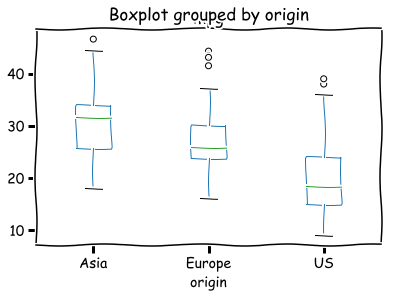

In [67]:
data.boxplot("mpg","origin")

We see that the Origin column is string and take specific values so we need to convert this 

In [72]:
df_origin = pd.get_dummies(data)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [73]:
# df_origin.drop("origin_US", axis = 1, inplace = True)
df_origin = df_origin.drop("origin_US", axis = 1)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe
0,18.0,250.0,88,3139,14.5,15.0,0,0
1,9.0,304.0,193,4732,18.5,20.0,0,0
2,36.1,91.0,60,1800,16.4,10.0,1,0
3,18.5,250.0,98,3525,19.0,15.0,0,0
4,34.3,97.0,78,2188,15.8,10.0,0,1


### Linear Regression after cleaning 



In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#axis = 1 

X = df_origin.drop("mpg",axis = 1).values
y = df_origin["mpg"].values

print(X[:10])
print(y[:10])

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=24)

[[  2.50000000e+02   8.80000000e+01   3.13900000e+03   1.45000000e+01
    1.50000000e+01   0.00000000e+00   0.00000000e+00]
 [  3.04000000e+02   1.93000000e+02   4.73200000e+03   1.85000000e+01
    2.00000000e+01   0.00000000e+00   0.00000000e+00]
 [  9.10000000e+01   6.00000000e+01   1.80000000e+03   1.64000000e+01
    1.00000000e+01   1.00000000e+00   0.00000000e+00]
 [  2.50000000e+02   9.80000000e+01   3.52500000e+03   1.90000000e+01
    1.50000000e+01   0.00000000e+00   0.00000000e+00]
 [  9.70000000e+01   7.80000000e+01   2.18800000e+03   1.58000000e+01
    1.00000000e+01   0.00000000e+00   1.00000000e+00]
 [  1.19000000e+02   1.00000000e+02   2.61500000e+03   1.48000000e+01
    1.00000000e+01   1.00000000e+00   0.00000000e+00]
 [  1.08000000e+02   7.50000000e+01   2.26500000e+03   1.52000000e+01
    1.00000000e+01   1.00000000e+00   0.00000000e+00]
 [  1.21000000e+02   7.60000000e+01   2.51100000e+03   1.80000000e+01
    1.00000000e+01   0.00000000e+00   1.00000000e+00]
 [  3.02

In [79]:
lr.fit(X_train, y_train)
# lr.predict()
lr.score(X_test, y_test)

0.76261563186013626

## Assignment #1

1. Load the data gapminder.csv 
2. Use pandas to create a boxplot showing the variation of life expectancy ('life') by region ('Region'). 
3. Use the get_dummies function to create dummy variables for the dataframe. 
4. Remove one extra dummy column
5. Do a linear Regression on the dataset and caculate the score. 
6. Make some plots which you like by yourself. 



## Missing Data

In [89]:

df = pd.read_csv('../datasets/diabetes.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [90]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
# how to check if a row has value 0 
# how to do filtering 



my_filter = (df["bmi"] == 0)
df[my_filter]


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [92]:
# change the wrong values to np.NaN
df.insulin.replace(0,np.nan, inplace=True)
df.triceps.replace(0,np.nan, inplace=True)

# df[df.bmi == 0]

df.bmi.replace(0,np.nan,inplace = True)


In [94]:
df.head()
# Question check datatype of changed columne

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [95]:
df.isnull()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,True,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,False,False,False


In [96]:
df.isnull().sum()

pregnancies      0
glucose          0
diastolic        0
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes         0
dtype: int64

In [87]:
df.shape

(768, 9)

**Option 1 : ** 

Remove the missing values rows

In [88]:
### option 1
# df.dropna(inplace = True)
# print(df.head())
# df.shape

    pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
3             1       89         66     23.0     94.0  28.1  0.167   21   
4             0      137         40     35.0    168.0  43.1  2.288   33   
6             3       78         50     32.0     88.0  31.0  0.248   26   
8             2      197         70     45.0    543.0  30.5  0.158   53   
13            1      189         60     23.0    846.0  30.1  0.398   59   

    diabetes  
3          0  
4          1  
6          1  
8          1  
13         1  


(393, 9)

**Option 2:**

Make a guess and replace the values with the guess 

eg. mean of all non-missing values. 

In [107]:
from sklearn.preprocessing import Imputer 

#take diabetic data X values
#how to do indexing in pandas 
# same as in numpy but with **iloc**

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

# print(y)

imp = Imputer(missing_values = "NaN", strategy = "mean",axis=0)
imp.fit(X)
X = imp.transform(X)

new_df = pd.DataFrame(X[:10])
print(new_df)

#find the missing values in numpy array
np.isnan(X).sum()

(768, 8)
(768,)
0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64
      0      1     2         3           4          5      6     7
0   6.0  148.0  72.0  35.00000  155.548223  33.600000  0.627  50.0
1   1.0   85.0  66.0  29.00000  155.548223  26.600000  0.351  31.0
2   8.0  183.0  64.0  29.15342  155.548223  23.300000  0.672  32.0
3   1.0   89.0  66.0  23.00000   94.000000  28.100000  0.167  21.0
4   0.0  137.0  40.0  35.00000  168.000000  43.100000  2.2

0

## Adding different steps in one go 

**How to add different steps since we are using the same format?**

**Answer** : Use Pipeline

What is pipeline?



In [108]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [ ('imp', Imputer(missing_values="NaN",strategy="mean",axis=0)),
          ('clf', KNeighborsClassifier(n_neighbors = 6))]


#split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

pipeline = Pipeline(steps)

#now use pipeline as a simple classifier 

pipeline.fit(X_train, y_train)
pipeline.predict(X_test)
pipeline.score(X_test, y_test)



0.69480519480519476

## Assignment #2 

1. Load the voting datasets (called as house representatives)
2. Find how all the missing values are represented 
3. Take one type of missing value and convert it to NaN
4. Count the number of nulls using `isnull()` and `sum()`
4. Drop the rows using dropna
6. Use Imputer to replace the missing values with `most_frequent`
7. Use pipeline to create a pipeline and do classification. 
8. Use the fit and predict to get the accuracy. 



## Centering and Scaling

What is this? We want the data to be on same scale and around one value for algorithm to perform better


In [110]:
# data = pd.read_csv('../datasets/winequality-red.csv')
# data.head()
data = pd.read_csv('../datasets/winequality-red.csv',sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Many algorithms use distance as a metric for them to work. 
So large values can influence the algorithms. 

eg. KNN. 

**Solution**

Standardizing the data : Centreing and Scaling : Make the data with mean 0 and variance 1 

Normalizing the data : Make the data transform between values 0 and 1. 

Pros & Cons

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors = 20)

steps = [("sclae",scaler),
         ("clf", knn)]

pipeline = Pipeline(steps)

## get the data 

X  = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

pipeline.fit(X_train,y_train)
pipeline.predict(X_test)
pipeline.score(X_test,y_test)

0.53749999999999998

In [52]:
knn2 =  KNeighborsClassifier(n_neighbors = 20)
knn2.fit(X_train,y_train)
knn2.score(X_test,y_test)

0.49375000000000002

## Assignment #3

1. Load the white wine datasets 
2. Look for the features, if there are any anamoly
3. Scale the features using `scale()` funciton 
4. Check the values of mean and std of the transformed object 
5. Create a pipeline with Scaling and Knearest neighbors
6. Now compute the accuracy with the scaled models and unscaled models 

In [112]:
from sklearn.preprocessing import scale

In [120]:
x = np.random.random((3,1))

In [121]:
x

array([[ 0.15072465],
       [ 0.64352086],
       [ 0.49501106]])

In [122]:
x = x * 100
x

array([[ 15.07246527],
       [ 64.35208583],
       [ 49.50110635]])

In [128]:
x

array([[-1.35182869],
       [ 1.03566342],
       [ 0.31616526]])

In [125]:
x = scale(x)

In [126]:
np.mean(x)

-1.8503717077085941e-17

In [127]:
np.std(x)

1.0